In [1]:
import pandas as pd 
import numpy as np 
import configparser
import os
import seaborn as sns
import plotly_express as px

import nltk 

config = configparser.ConfigParser()
config.read("env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']
base_path = config['DEFAULT']['base_path']
code_dir = config['DEFAULT']['code_dir']

data_prefix = 'Maha'
out_path = f'{output_dir}/{data_prefix}'
OHCO = ['book_id','chap_id','sec_id', 'para_num', 'sent_num', 'token_num']


os.chdir(code_dir)
import preprocess
import bow_analysis
os.chdir(base_path)

In [2]:
CORPUS = pd.read_csv(f"{output_dir}\{data_prefix}-CORPUS.csv", sep="|").set_index(OHCO)
LIB = pd.read_csv(f"{output_dir}\{data_prefix}-LIB.csv", sep="|")
VOCAB = pd.read_csv(f"{output_dir}\{data_prefix}-VOCAB.csv", sep="|")
LIB

<string>:1: SyntaxWarning: invalid escape sequence '\{'
<string>:2: SyntaxWarning: invalid escape sequence '\{'
<string>:3: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<string>:1: SyntaxWarning: invalid escape sequence '\{'
<string>:2: SyntaxWarning: invalid escape sequence '\{'
<string>:3: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
C:\Users\vishg\AppData\Local\Temp\ipykernel_29352\578513818.py:1: SyntaxWarning: invalid escape sequence '\{'
  CORPUS = pd.read_csv(f"{output_dir}\{data_prefix}-CORPUS.csv", sep="|").set_index(OHCO)
C:\Users\vishg\AppData\Local\Temp\ipykernel_29352\578513818.py:2: SyntaxWarning: invalid escape sequence '\{'
  LIB = pd.read_csv(f"{output_dir}\{data_prefix}-LIB.c

book_id source_file_path              raw_title  book_len  n_chaps  \
0         1       maha01.txt              Adi Parva    228682       18   
1         2       maha02.txt            Sabha Parva     74953        9   
2         3       maha03.txt             Vana Parva    323183       12   
3         4       maha04.txt           Virata Parva     61159        4   
4         5       maha05.txt           Udyoga Parva    188734       11   
5         6       maha06.txt          Bhishma Parva    148381        3   
6         7       maha07.txt            Drona Parva    245956        5   
7         8       maha08.txt            Karna Parva    138246        2   
8         9       maha09.txt           Shalya Parva     91545        4   
9        10       maha10.txt         Sauptika Parva     21344        2   
10       11       maha11.txt             Stri Parva     21837        2   
11       12       maha12.txt            Santi Parva    456651        3   
12       13       maha13.txt        Anusasana Parva    277586        2   
13       14       maha14.txt        Aswamedha Parva     81006        2   
14       15       maha15.txt     Asramavasika Parva     30376        3   
15       16       maha16.txt          Mausala Parva      8072        1   
16       17       maha17.txt  Mahaprasthanika Parva      3062        1   
17       18       maha18.txt   Svargarohanika Parva      8628        1   

    n_secs  n_sents  n_tokens  
0      234    12422    228682  
1       78     3766     74953  
2      312    16645    323183  
3       71     2893     61159  
4      198     9605    188734  
5      123     7481    148381  
6      199    12384    245956  
7       95     6455    138246  
8       64     4636     91545  
9       17     1182     21344  
10      25     1154     21837  
11     362    25373    456651  
12     167    15305    277586  
13      91     4694     81006  
14      38     1742     30376  
15       7      432      8072  
16       2      206      3062  
17       5      495      8628

In [3]:

LIB.sum(axis=0)

book_id                                                           171
source_file_path    maha01.txtmaha02.txtmaha03.txtmaha04.txtmaha05...
raw_title           Adi ParvaSabha ParvaVana ParvaVirata ParvaUdyo...
book_len                                                      2409401
n_chaps                                                            85
n_secs                                                           2088
n_sents                                                        126870
n_tokens                                                      2409401
dtype: object

In [4]:
CORPUS

pos_tuple  pos  \
book_id chap_id sec_id para_num sent_num token_num                            
1       1       1      0        0        1              ('Adi', 'NNP')  NNP   
                                         2            ('Parva', 'NNP')  NNP   
                                         4               ('Om', 'NNP')  NNP   
                                1        0           ('Having', 'VBG')  VBG   
                                         1            ('bowed', 'VBN')  VBN   
...                                                                ...  ...   
18      1       5      0        147      25               ('of', 'IN')   IN   
                                         26          ('Vishnu', 'NNP')  NNP   
                                         27             ('like', 'IN')   IN   
                                         28          ('Vishnu', 'NNP')  NNP   
                                         29         ('himself', 'PRP')  PRP   

                                                   token_str term_str  \
book_id chap_id sec_id para_num sent_num token_num                      
1       1       1      0        0        1               Adi      adi   
                                         2             Parva    parva   
                                         4                Om       om   
                                1        0            Having   having   
                                         1             bowed    bowed   
...                                                      ...      ...   
18      1       5      0        147      25               of       of   
                                         26           Vishnu   vishnu   
                                         27             like     like   
                                         28           Vishnu   vishnu   
                                         29          himself  himself   

                                                   pos_group  
book_id chap_id sec_id para_num sent_num token_num            
1       1       1      0        0        1                NN  
                                         2                NN  
                                         4                NN  
                                1        0                VB  
                                         1                VB  
...                                                      ...  
18      1       5      0        147      25               IN  
                                         26               NN  
                                         27               IN  
                                         28               NN  
                                         29               PR  

[2409401 rows x 5 columns]

In [5]:
book_bow = bow_analysis.bow_rep(CORPUS, "CHAPS")
book_bow

n
book_id chap_id term_str         
1       1       a             115
                abandoning      2
                abdicating      2
                abduction       3
                abhimanyu       8
...                           ...
18      1       your            5
                yours           1
                yourself        1
                yudhamanyu      1
                yudhishthira   30

[229550 rows x 1 columns]

In [6]:
DTCM = book_bow.n.unstack(fill_value=0)
DTCM

term_str         01  1  10  100  1000  10000  100000  1001  1002  1003  ...  \
book_id chap_id                                                         ...   
1       1         0  0   0    0     0      0       0     0     0     0  ...   
        2         0  0   0    0     0      0       0     0     0     0  ...   
        3         0  0   0    0     0      0       0     0     0     0  ...   
        4         0  1   0    0     0      0       0     0     0     0  ...   
        5         0  0   0    0     0      0       0     0     0     0  ...   
...              .. ..  ..  ...   ...    ...     ...   ...   ...   ...  ...   
15      2         0  0   0    0     0      0       0     0     0     0  ...   
        3         0  0   0    0     0      0       0     0     0     0  ...   
16      1         0  0   0    0     1      0       0     0     0     0  ...   
17      1         0  0   0    0     2      0       0     0     0     0  ...   
18      1         0  0   0    0     1      0       0     0     0     0  ...   

term_str         yuyudhana  yuyudhanas  yuyutshu  yuyutsu  yuyutsus  zeal  \
book_id chap_id                                                             
1       1                1           0         0        0         0     0   
        2                0           0         0        0         0     0   
        3                0           0         0        0         0     0   
        4                0           0         0        0         0     0   
        5                0           0         0        2         0     0   
...                    ...         ...       ...      ...       ...   ...   
15      2                0           0         0        0         0     0   
        3                0           0         0        1         0     0   
16      1                6           0         0        0         0     0   
17      1                0           0         0        2         0     0   
18      1                0           0         0        0         0     0   

term_str         zealously  zenana  zodiac  zone  
book_id chap_id                                   
1       1                0       0       0     0  
        2                0       0       1     0  
        3                0       0       0     0  
        4                0       0       0     0  
        5                0       0       0     0  
...                    ...     ...     ...   ...  
15      2                0       0       0     0  
        3                0       0       0     0  
16      1                0       0       0     0  
17      1                0       0       0     0  
18      1                0       0       0     0  

[85 rows x 30671 columns]

In [7]:
DF = DTCM.astype('bool').sum() 
DF

term_str
01            1
1            12
10            9
100           7
1000         12
             ..
zeal          2
zealously     4
zenana        1
zodiac        2
zone          1
Length: 30671, dtype: int64

In [8]:
TFIDF_dict = bow_analysis.compute_TFIDF(book_bow, "raw", "standard")


In [9]:
# Collapse the TF, IDF, TFIDF matrices to long-form
TF = TFIDF_dict['TF'].stack().rename("TF")
IDF = TFIDF_dict['IDF']
TFIDF = TFIDF_dict['TFIDF'].stack().rename("TFIDF")

# Merge into one DataFrame
combined = pd.concat([TF, TFIDF], axis=1).reset_index()
combined['IDF'] = combined['term_str'].map(IDF)
combined.sort_values(by="TFIDF", ascending = False)

book_id  chap_id   term_str   TF       TFIDF       IDF
1039045        3        7     tirtha  216  778.039779  3.602036
2289931       12        3   prakriti  191  730.465831  3.824428
999539         3        6       nala  228  643.969683  2.824428
2308414       13        1    deities  619  629.568505  1.017074
989108         3        6  damayanti  157  600.435264  3.824428
...          ...      ...        ...  ...         ...       ...
887117         3        2    ushampa    0    0.000000  6.409391
887118         3        2    ushango    0    0.000000  6.409391
887119         3        2    ushangu    0    0.000000  6.409391
887120         3        2      usher    0    0.000000  4.824428
2607034       18        1       zone    0    0.000000  6.409391

[2607035 rows x 6 columns]

In [10]:
book_bow['tf'] = TFIDF_dict['TF'].stack()
book_bow['tfidf'] = TFIDF_dict['TFIDF'].stack()
agg_tfidf = book_bow.reset_index().groupby("term_str")\
            .agg({"tfidf":"mean","n":"mean"})

# Merging the Vocab Table to get the Frequently Used POS
agg_tfidf = agg_tfidf.reset_index().merge(VOCAB.reset_index()[['term_str','max_pos','cat_pos']], on="term_str", how='left')

print("Top 20 words in the corpus by TFIDF mean using the `max` count method and `book` as the bag:")
agg_tfidf.sort_values('tfidf', ascending=False).head(20).reset_index(drop=True)

Top 20 words in the corpus by TFIDF mean using the `max` count method and `book` as the bag:


term_str       tfidf          n max_pos  \
0        jajali  307.650765  48.000000     NNP   
1     rituparna  230.738074  36.000000     NNP   
2        iravat  224.328683  35.000000     NNP   
3        vandin  224.328683  35.000000     NNP   
4      sambhava  219.080333  40.500000     NNP   
5      jivasoul  217.919292  34.000000     NNP   
6       yavakri  211.509901  33.000000     NNP   
7       swaitya  185.872337  29.000000     NNP   
8        tirtha  183.189260  50.857143      NN   
9    dasarnakas  166.644164  26.000000     NNP   
10      vahikas  153.825382  24.000000     NNP   
11   transcends  149.919292  34.000000     VBZ   
12       shalya  146.139747  40.571429     NNP   
13   sarmishtha  146.053555  27.000000     NNP   
14    yatudhani  141.006601  22.000000     NNP   
15  panchasikha  134.597210  21.000000     NNP   
16    varshneya  134.597210  21.000000     NNP   
17     prakriti  131.305376  34.333333     NNP   
18    tuladhara  128.187819  20.000000     NNP   
19     bhagavad  128.187819  20.000000     NNP   

                                    cat_pos  
0                                   {'NNP'}  
1                                   {'NNP'}  
2                             {'JJ', 'NNP'}  
3                                   {'NNP'}  
4                                   {'NNP'}  
5                             {'JJ', 'NNP'}  
6                       {'RB', 'NN', 'NNP'}  
7                                   {'NNP'}  
8   {'VBZ', 'NN', 'NNP', 'JJ', 'RB', 'VBD'}  
9                                   {'NNP'}  
10                          {'NNPS', 'NNP'}  
11                    {'VBZ', 'NNS', 'VBP'}  
12                            {'VB', 'NNP'}  
13                                  {'NNP'}  
14                            {'NN', 'NNP'}  
15                                  {'NNP'}  
16                                  {'NNP'}  
17                            {'NN', 'NNP'}  
18                                  {'NNP'}  
19                                  {'NNP'}

In [11]:
", ".join(list(agg_tfidf.sort_values('tfidf', ascending=False)['term_str'].head(20)))

'jajali, rituparna, iravat, vandin, sambhava, jivasoul, yavakri, swaitya, tirtha, dasarnakas, vahikas, transcends, shalya, sarmishtha, yatudhani, panchasikha, varshneya, prakriti, tuladhara, bhagavad'

In [12]:
book_bow.to_csv(f"{output_dir}\{data_prefix}-BOW-BOOKS.csv",sep = "|")
book_bow

<string>:1: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<string>:1: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
C:\Users\vishg\AppData\Local\Temp\ipykernel_29352\3026988511.py:1: SyntaxWarning: invalid escape sequence '\{'
  book_bow.to_csv(f"{output_dir}\{data_prefix}-BOW-BOOKS.csv",sep = "|")
<string>:1: SyntaxWarning: invalid escape sequence '\{'


n   tf      tfidf
book_id chap_id term_str                         
1       1       a             115  115   0.000000
                abandoning      2    2   2.034147
                abdicating      2    2  12.818782
                abduction       3    3  10.806108
                abhimanyu       8    8  10.919975
...                           ...  ...        ...
18      1       your            5    5   1.504332
                yours           1    1   1.455195
                yourself        1    1   3.602036
                yudhamanyu      1    1   2.321928
                yudhishthira   30   30   3.168306

[229550 rows x 3 columns]

In [13]:
DTCM = book_bow.n.unstack(fill_value=0)
DTCM.to_csv(f"{output_dir}\{data_prefix}-DTCM-BOOKS.csv",sep = "|")
DTCM

<string>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<string>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
C:\Users\vishg\AppData\Local\Temp\ipykernel_29352\573807581.py:2: SyntaxWarning: invalid escape sequence '\{'
  DTCM.to_csv(f"{output_dir}\{data_prefix}-DTCM-BOOKS.csv",sep = "|")
<string>:2: SyntaxWarning: invalid escape sequence '\{'


term_str         01  1  10  100  1000  10000  100000  1001  1002  1003  ...  \
book_id chap_id                                                         ...   
1       1         0  0   0    0     0      0       0     0     0     0  ...   
        2         0  0   0    0     0      0       0     0     0     0  ...   
        3         0  0   0    0     0      0       0     0     0     0  ...   
        4         0  1   0    0     0      0       0     0     0     0  ...   
        5         0  0   0    0     0      0       0     0     0     0  ...   
...              .. ..  ..  ...   ...    ...     ...   ...   ...   ...  ...   
15      2         0  0   0    0     0      0       0     0     0     0  ...   
        3         0  0   0    0     0      0       0     0     0     0  ...   
16      1         0  0   0    0     1      0       0     0     0     0  ...   
17      1         0  0   0    0     2      0       0     0     0     0  ...   
18      1         0  0   0    0     1      0       0     0     0     0  ...   

term_str         yuyudhana  yuyudhanas  yuyutshu  yuyutsu  yuyutsus  zeal  \
book_id chap_id                                                             
1       1                1           0         0        0         0     0   
        2                0           0         0        0         0     0   
        3                0           0         0        0         0     0   
        4                0           0         0        0         0     0   
        5                0           0         0        2         0     0   
...                    ...         ...       ...      ...       ...   ...   
15      2                0           0         0        0         0     0   
        3                0           0         0        1         0     0   
16      1                6           0         0        0         0     0   
17      1                0           0         0        2         0     0   
18      1                0           0         0        0         0     0   

term_str         zealously  zenana  zodiac  zone  
book_id chap_id                                   
1       1                0       0       0     0  
        2                0       0       1     0  
        3                0       0       0     0  
        4                0       0       0     0  
        5                0       0       0     0  
...                    ...     ...     ...   ...  
15      2                0       0       0     0  
        3                0       0       0     0  
16      1                0       0       0     0  
17      1                0       0       0     0  
18      1                0       0       0     0  

[85 rows x 30671 columns]

In [14]:
TFIDF_dict['TFIDF'].to_csv(f"{output_dir}\{data_prefix}-TFIDF-BOOKS.csv",sep = "|")
TFIDF_dict['TFIDF']

<string>:1: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<string>:1: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
C:\Users\vishg\AppData\Local\Temp\ipykernel_29352\1201469117.py:1: SyntaxWarning: invalid escape sequence '\{'
  TFIDF_dict['TFIDF'].to_csv(f"{output_dir}\{data_prefix}-TFIDF-BOOKS.csv",sep = "|")
<string>:1: SyntaxWarning: invalid escape sequence '\{'


term_str          01         1   10  100      1000  10000  100000  1001  1002  \
book_id chap_id                                                                 
1       1        0.0  0.000000  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
        2        0.0  0.000000  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
        3        0.0  0.000000  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
        4        0.0  2.824428  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
        5        0.0  0.000000  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
...              ...       ...  ...  ...       ...    ...     ...   ...   ...   
15      2        0.0  0.000000  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
        3        0.0  0.000000  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
16      1        0.0  0.000000  0.0  0.0  2.824428    0.0     0.0   0.0   0.0   
17      1        0.0  0.000000  0.0  0.0  5.648857    0.0     0.0   0.0   0.0   
18      1        0.0  0.000000  0.0  0.0  2.824428    0.0     0.0   0.0   0.0   

term_str         1003  ...  yuyudhana  yuyudhanas  yuyutshu   yuyutsu  \
book_id chap_id        ...                                              
1       1         0.0  ...    1.55141         0.0       0.0  0.000000   
        2         0.0  ...    0.00000         0.0       0.0  0.000000   
        3         0.0  ...    0.00000         0.0       0.0  0.000000   
        4         0.0  ...    0.00000         0.0       0.0  0.000000   
        5         0.0  ...    0.00000         0.0       0.0  4.034147   
...               ...  ...        ...         ...       ...       ...   
15      2         0.0  ...    0.00000         0.0       0.0  0.000000   
        3         0.0  ...    0.00000         0.0       0.0  2.017074   
16      1         0.0  ...    9.30846         0.0       0.0  0.000000   
17      1         0.0  ...    0.00000         0.0       0.0  4.034147   
18      1         0.0  ...    0.00000         0.0       0.0  0.000000   

term_str         yuyutsus  zeal  zealously  zenana    zodiac  zone  
book_id chap_id                                                     
1       1             0.0   0.0        0.0     0.0  0.000000   0.0  
        2             0.0   0.0        0.0     0.0  5.409391   0.0  
        3             0.0   0.0        0.0     0.0  0.000000   0.0  
        4             0.0   0.0        0.0     0.0  0.000000   0.0  
        5             0.0   0.0        0.0     0.0  0.000000   0.0  
...                   ...   ...        ...     ...       ...   ...  
15      2             0.0   0.0        0.0     0.0  0.000000   0.0  
        3             0.0   0.0        0.0     0.0  0.000000   0.0  
16      1             0.0   0.0        0.0     0.0  0.000000   0.0  
17      1             0.0   0.0        0.0     0.0  0.000000   0.0  
18      1             0.0   0.0        0.0     0.0  0.000000   0.0  

[85 rows x 30671 columns]

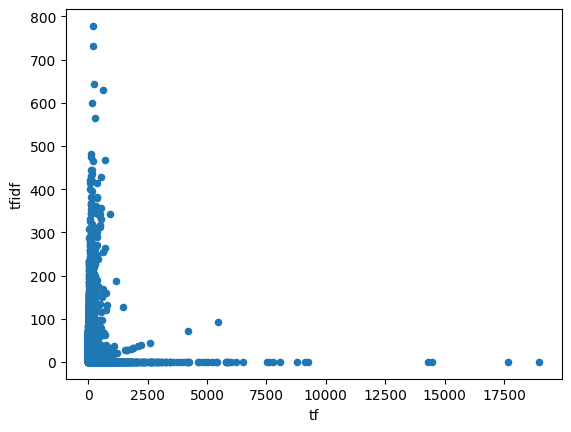

In [15]:
book_bow.plot.scatter('tf', 'tfidf');

In [16]:
def top_books_for_term(term_str):
    X = book_bow.reset_index().merge(LIB, on="book_id")
    
    X = X.query(f"term_str == '{term_str}'").groupby(['book_id','raw_title'])\
        .agg({'tfidf':'mean', 'n':'sum', 'tf':'sum'}).sort_values("book_id")
    return px.scatter(X.reset_index(), 'n','tfidf', 
                      color="book_id",
                      size='tf',
                      hover_name='raw_title', 
                      height=500, 
                      width=600, 
                      title=f"{term_str}")

In [17]:
top_books_for_term('kesava')

In [18]:
BOOL = DTCM.astype('bool')
DF = BOOL.sum()
BOOL_TFIDF = TFIDF_dict['TF'] * TFIDF_dict['IDF']
DOC = pd.DataFrame(index=DTCM.index)
DOC['book_chap_sig_bool'] = BOOL_TFIDF.T.mean()
DOC['book_chap_sig'] = TFIDF_dict['TFIDF'].T.mean()
DOC['n_tokens'] = DTCM.sum(1)
DOC

book_chap_sig_bool  book_chap_sig  n_tokens
book_id chap_id                                             
1       1                  0.382170       0.382170     16164
        2                  0.130119       0.130119      6137
        3                  0.101365       0.101365      4661
        4                  0.577316       0.577316     30619
        5                  0.139432       0.139432      8345
...                             ...            ...       ...
15      2                  0.089501       0.089501      6789
        3                  0.034877       0.034877      2551
16      1                  0.142291       0.142291      8072
17      1                  0.037708       0.037708      3062
18      1                  0.142673       0.142673      8628

[85 rows x 3 columns]

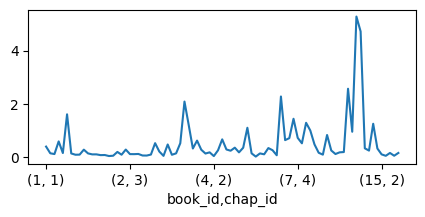

In [19]:
DOC.book_chap_sig.plot.line(figsize=(5,2));

In [20]:
DOC

book_chap_sig_bool  book_chap_sig  n_tokens
book_id chap_id                                             
1       1                  0.382170       0.382170     16164
        2                  0.130119       0.130119      6137
        3                  0.101365       0.101365      4661
        4                  0.577316       0.577316     30619
        5                  0.139432       0.139432      8345
...                             ...            ...       ...
15      2                  0.089501       0.089501      6789
        3                  0.034877       0.034877      2551
16      1                  0.142291       0.142291      8072
17      1                  0.037708       0.037708      3062
18      1                  0.142673       0.142673      8628

[85 rows x 3 columns]

In [21]:
DF

term_str
01            1
1            12
10            9
100           7
1000         12
             ..
zeal          2
zealously     4
zenana        1
zodiac        2
zone          1
Length: 30671, dtype: int64

In [22]:
VOCAB["df"] = VOCAB["term_str"].map(DF)
VOCAB["idf"] = VOCAB["term_str"].map(TFIDF_dict['IDF'])
VOCAB['dp'] = VOCAB.df / len(DTCM)
VOCAB['di'] = np.log2(1/VOCAB.dp)
VOCAB['dh'] = VOCAB.dp * VOCAB.di

VOCAB['tfidf_mean'] = VOCAB['term_str'].map(TFIDF_dict['TFIDF'].mean())
VOCAB['tfidf_sum'] = VOCAB['term_str'].map(TFIDF_dict['TFIDF'].sum())


In [23]:
VOCAB["df"] = VOCAB["term_str"].map(DF)
VOCAB

term_str   n  n_chars             p          i             s  \
0             01   1        2  4.150409e-07  21.200243  2.409401e+06   
1              1  15        1  6.225614e-06  17.293352  1.606267e+05   
2             10   9        2  3.735368e-06  18.030318  2.677112e+05   
3            100   9        3  3.735368e-06  18.030318  2.677112e+05   
4           1000  41        4  1.701668e-05  15.842691  5.876588e+04   
...          ...  ..      ...           ...        ...           ...   
30667       zeal   2        4  8.300818e-07  20.200243  1.204700e+06   
30668  zealously   4        9  1.660164e-06  19.200243  6.023502e+05   
30669     zenana   1        6  4.150409e-07  21.200243  2.409401e+06   
30670     zodiac   2        6  8.300818e-07  20.200243  1.204700e+06   
30671       zone   1        4  4.150409e-07  21.200243  2.409401e+06   

              h  stop stem_porter stem_snowball  ... cat_pos_group n_pos  \
0      0.000009     0          01            01  ...        {'CD'}     1   
1      0.000108     0           1             1  ...        {'CD'}     1   
2      0.000067     0          10            10  ...        {'CD'}     1   
3      0.000067     0         100           100  ...        {'CD'}     1   
4      0.000270     0        1000          1000  ...        {'CD'}     1   
...         ...   ...         ...           ...  ...           ...   ...   
30667  0.000017     0        zeal          zeal  ...        {'NN'}     1   
30668  0.000032     0     zealous       zealous  ...        {'RB'}     1   
30669  0.000009     0      zenana        zenana  ...        {'NN'}     1   
30670  0.000017     0      zodiac        zodiac  ...        {'NN'}     1   
30671  0.000009     0        zone          zone  ...        {'NN'}     1   

       cat_pos    df       idf        dp        di        dh  tfidf_mean  \
0       {'CD'}   1.0  6.409391  0.011765  6.409391  0.075405    0.075405   
1       {'CD'}  12.0  2.824428  0.141176  2.824428  0.398743    0.498429   
2       {'CD'}   9.0  3.239466  0.105882  3.239466  0.343002    0.343002   
3       {'CD'}   7.0  3.602036  0.082353  3.602036  0.296638    0.381392   
4       {'CD'}  12.0  2.824428  0.141176  2.824428  0.398743    1.362371   
...        ...   ...       ...       ...       ...       ...         ...   
30667   {'NN'}   2.0  5.409391  0.023529  5.409391  0.127280    0.127280   
30668   {'RB'}   4.0  4.409391  0.047059  4.409391  0.207501    0.207501   
30669   {'NN'}   1.0  6.409391  0.011765  6.409391  0.075405    0.075405   
30670  {'NNP'}   2.0  5.409391  0.023529  5.409391  0.127280    0.127280   
30671   {'NN'}   1.0  6.409391  0.011765  6.409391  0.075405    0.075405   

        tfidf_sum  
0        6.409391  
1       42.366427  
2       29.155193  
3       32.418324  
4      115.801566  
...           ...  
30667   10.818782  
30668   17.637564  
30669    6.409391  
30670   10.818782  
30671    6.409391  

[30672 rows x 24 columns]

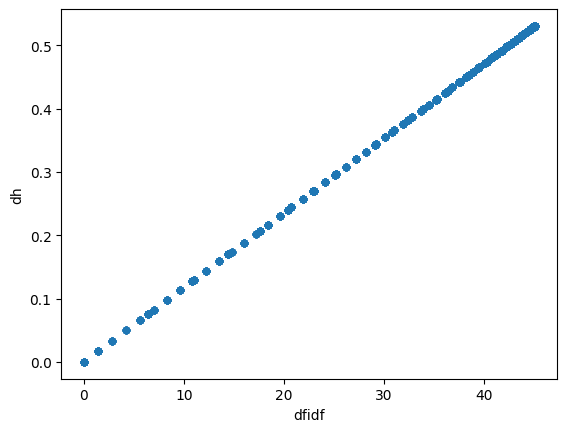

In [24]:
VOCAB['dfidf'] = VOCAB.df * VOCAB.idf
VOCAB.plot.scatter('dfidf', 'dh');

In [25]:
VOCAB

term_str   n  n_chars             p          i             s  \
0             01   1        2  4.150409e-07  21.200243  2.409401e+06   
1              1  15        1  6.225614e-06  17.293352  1.606267e+05   
2             10   9        2  3.735368e-06  18.030318  2.677112e+05   
3            100   9        3  3.735368e-06  18.030318  2.677112e+05   
4           1000  41        4  1.701668e-05  15.842691  5.876588e+04   
...          ...  ..      ...           ...        ...           ...   
30667       zeal   2        4  8.300818e-07  20.200243  1.204700e+06   
30668  zealously   4        9  1.660164e-06  19.200243  6.023502e+05   
30669     zenana   1        6  4.150409e-07  21.200243  2.409401e+06   
30670     zodiac   2        6  8.300818e-07  20.200243  1.204700e+06   
30671       zone   1        4  4.150409e-07  21.200243  2.409401e+06   

              h  stop stem_porter stem_snowball  ... n_pos  cat_pos    df  \
0      0.000009     0          01            01  ...     1   {'CD'}   1.0   
1      0.000108     0           1             1  ...     1   {'CD'}  12.0   
2      0.000067     0          10            10  ...     1   {'CD'}   9.0   
3      0.000067     0         100           100  ...     1   {'CD'}   7.0   
4      0.000270     0        1000          1000  ...     1   {'CD'}  12.0   
...         ...   ...         ...           ...  ...   ...      ...   ...   
30667  0.000017     0        zeal          zeal  ...     1   {'NN'}   2.0   
30668  0.000032     0     zealous       zealous  ...     1   {'RB'}   4.0   
30669  0.000009     0      zenana        zenana  ...     1   {'NN'}   1.0   
30670  0.000017     0      zodiac        zodiac  ...     1  {'NNP'}   2.0   
30671  0.000009     0        zone          zone  ...     1   {'NN'}   1.0   

            idf        dp        di        dh  tfidf_mean   tfidf_sum  \
0      6.409391  0.011765  6.409391  0.075405    0.075405    6.409391   
1      2.824428  0.141176  2.824428  0.398743    0.498429   42.366427   
2      3.239466  0.105882  3.239466  0.343002    0.343002   29.155193   
3      3.602036  0.082353  3.602036  0.296638    0.381392   32.418324   
4      2.824428  0.141176  2.824428  0.398743    1.362371  115.801566   
...         ...       ...       ...       ...         ...         ...   
30667  5.409391  0.023529  5.409391  0.127280    0.127280   10.818782   
30668  4.409391  0.047059  4.409391  0.207501    0.207501   17.637564   
30669  6.409391  0.011765  6.409391  0.075405    0.075405    6.409391   
30670  5.409391  0.023529  5.409391  0.127280    0.127280   10.818782   
30671  6.409391  0.011765  6.409391  0.075405    0.075405    6.409391   

           dfidf  
0       6.409391  
1      33.893141  
2      29.155193  
3      25.214252  
4      33.893141  
...          ...  
30667  10.818782  
30668  17.637564  
30669   6.409391  
30670  10.818782  
30671   6.409391  

[30672 rows x 25 columns]

In [26]:
VOCAB.sample(25).sort_values('dh', ascending=False)[['term_str','max_pos', 'tfidf_mean', 'dh']].head(15)\
    .style.background_gradient(cmap='YlGnBu')

In [27]:
a = VOCAB[VOCAB['term_str'].str.startswith('d')==True]

px.scatter(a.reset_index(), x='i', y='tfidf_mean', 
           hover_name='term_str', hover_data=['n'], color='max_pos', 
           log_x=False, log_y=False, height=500, width=500)

In [28]:
px.scatter(VOCAB.reset_index(), x='i', y='dh', 
           hover_name='term_str', hover_data=['n'], 
           color='max_pos', height=500, width=800)

In [29]:
BOOK = CORPUS.loc[6].copy()

TTM = pd.get_dummies(['term_str'], columns=['term_str'], prefix='', prefix_sep='', drop_first=True)\
    .reset_index(drop=True).iloc[:,1:]
TTM.index.name = 'time_id'

In [30]:
CORPUS

pos_tuple  pos  \
book_id chap_id sec_id para_num sent_num token_num                            
1       1       1      0        0        1              ('Adi', 'NNP')  NNP   
                                         2            ('Parva', 'NNP')  NNP   
                                         4               ('Om', 'NNP')  NNP   
                                1        0           ('Having', 'VBG')  VBG   
                                         1            ('bowed', 'VBN')  VBN   
...                                                                ...  ...   
18      1       5      0        147      25               ('of', 'IN')   IN   
                                         26          ('Vishnu', 'NNP')  NNP   
                                         27             ('like', 'IN')   IN   
                                         28          ('Vishnu', 'NNP')  NNP   
                                         29         ('himself', 'PRP')  PRP   

                                                   token_str term_str  \
book_id chap_id sec_id para_num sent_num token_num                      
1       1       1      0        0        1               Adi      adi   
                                         2             Parva    parva   
                                         4                Om       om   
                                1        0            Having   having   
                                         1             bowed    bowed   
...                                                      ...      ...   
18      1       5      0        147      25               of       of   
                                         26           Vishnu   vishnu   
                                         27             like     like   
                                         28           Vishnu   vishnu   
                                         29          himself  himself   

                                                   pos_group  
book_id chap_id sec_id para_num sent_num token_num            
1       1       1      0        0        1                NN  
                                         2                NN  
                                         4                NN  
                                1        0                VB  
                                         1                VB  
...                                                      ...  
18      1       5      0        147      25               IN  
                                         26               NN  
                                         27               IN  
                                         28               NN  
                                         29               PR  

[2409401 rows x 5 columns]

In [31]:
BOOK = CORPUS.loc[13]
BOOK

pos_tuple   pos  \
chap_id sec_id para_num sent_num token_num                                 
1       1      0        0        1          ('Dana-dharma', 'NNP')   NNP   
                                 2                ('Parva', 'NNP')   NNP   
                                 4                   ('OM', 'NNP')   NNP   
                        1        0                ('HAVING', 'NN')    NN   
                                 1                ('BOWED', 'NNP')   NNP   
...                                                            ...   ...   
2       167    0        51       22                   ('to', 'TO')    TO   
                                 23               ('depart', 'VB')    VB   
                                 24                 ('from', 'IN')    IN   
                                 25                ('her', 'PRP$')  PRP$   
                                 26               ('banks', 'NNS')   NNS   

                                              token_str    term_str pos_group  
chap_id sec_id para_num sent_num token_num                                     
1       1      0        0        1          Dana-dharma  danadharma        NN  
                                 2                Parva       parva        NN  
                                 4                   OM          om        NN  
                        1        0               HAVING      having        NN  
                                 1                BOWED       bowed        NN  
...                                                 ...         ...       ...  
2       167    0        51       22                  to          to        TO  
                                 23              depart      depart        VB  
                                 24                from        from        IN  
                                 25                 her         her        PR  
                                 26               banks       banks        NN  

[277586 rows x 5 columns]

In [32]:
TTM = pd.get_dummies(BOOK['term_str'], columns=['term_str'], prefix='', prefix_sep='', drop_first=True)\
    .reset_index(drop=True).iloc[:,1:]
TTM.index.name = 'time_id'
TTM = TTM.astype('int')
cfg = {'figsize': (20,1)}

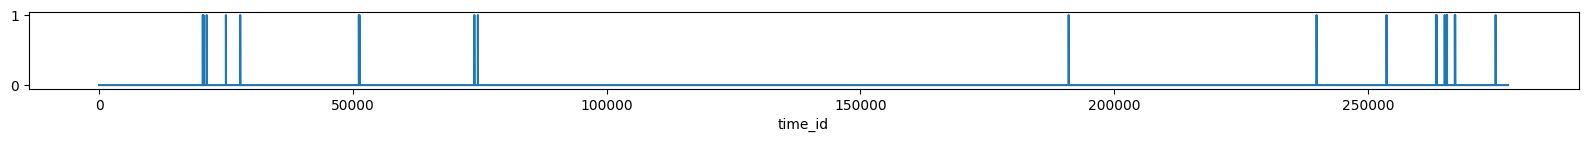

In [33]:
TTM['kesava'].plot(**cfg);

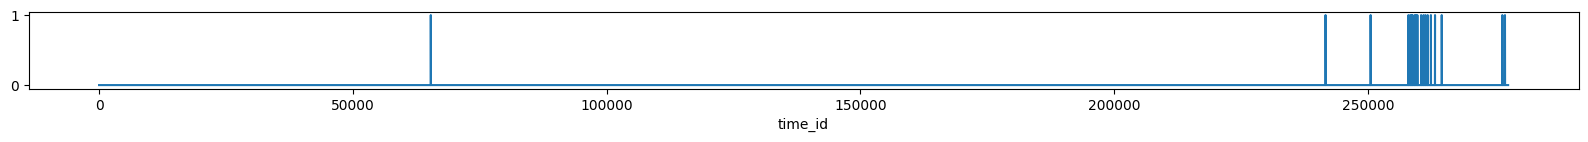

In [34]:
TTM['arjuna'].plot(**cfg);

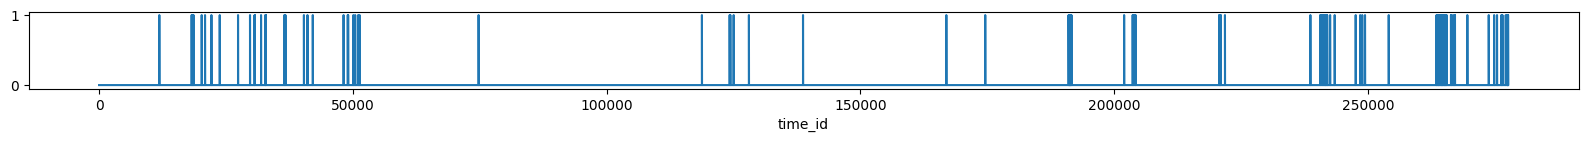

In [35]:
TTM['krishna'].plot(**cfg);

In [36]:
import matplotlib.pyplot as plt
B = BOOK['term_str'].reset_index(drop=True).to_frame().reset_index().rename(columns={'index':'offset'})
def plot_words(words, book):    
    
    X = book[book.term_str.isin(words)]
    
    plt.figure(figsize=(22, len(words)))
    
    ax = sns.stripplot(y='term_str', x='offset', data=X, orient='h', marker=".", color='navy', size=15, jitter=0)
    ax.set_title('Dispersion Plots', size=30, pad=20)
    ax.set_xlabel('Narrative Time', size=20)
    ax.set_ylabel('Term', size=20)
    
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(rotation=0, fontsize=20)
    # plt.tight_layout()
    plt.show()

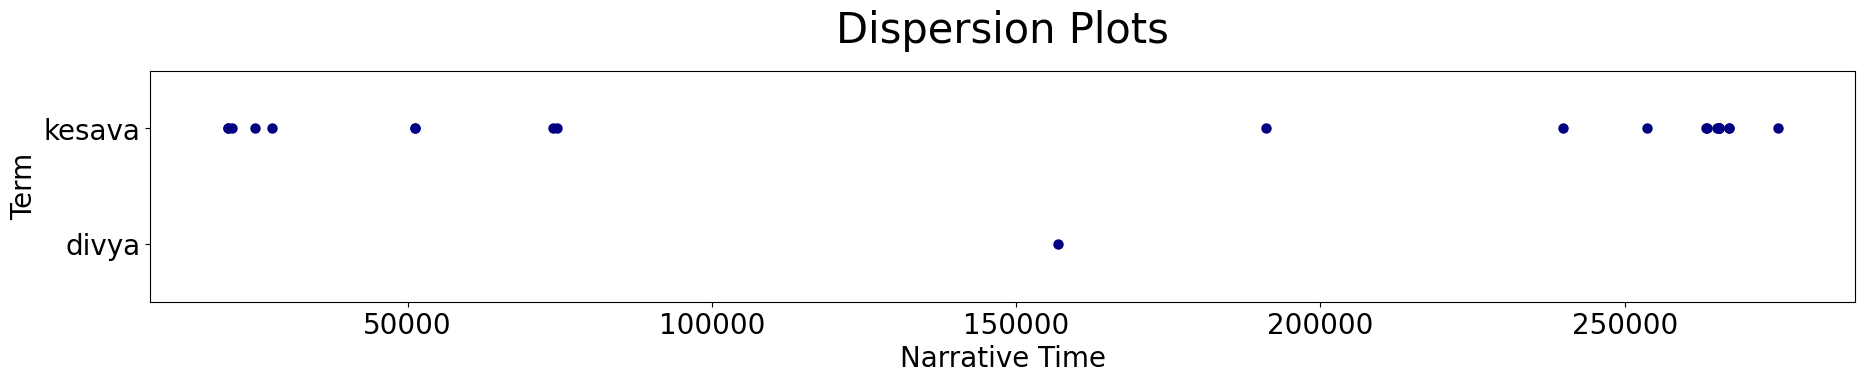

In [37]:
names = 'divya kesava anika'.split()
plot_words(names, B)

In [38]:
VOCAB.dh.describe()

count    30671.000000
mean         0.192163
std          0.146795
min          0.000000
25%          0.075405
50%          0.127280
75%          0.269960
max          0.530718
Name: dh, dtype: float64

In [39]:
thresh = VOCAB.dh.quantile(.9).round(3)
thresh

0.458

In [40]:
VOCAB2 = VOCAB.sort_values("n", ascending = False).reset_index().rename_axis("term_rank").reset_index().set_index("term_str")
VOCAB2.term_rank = VOCAB2.term_rank+1

SIGS = VOCAB2[VOCAB2.dh > thresh]
len(SIGS)

3083

In [41]:
SIGS.loc[SIGS.max_pos_group == 'NN'].sort_values('dh', ascending=False)[['term_rank', 'n', 'max_pos', 'df', 'dh']].head(10)

term_rank    n max_pos    df        dh
term_str                                        
adityas        2618   75     NNP  31.0  0.530718
union          1274  195      NN  31.0  0.530718
shone          1657  139      NN  31.0  0.530718
sudras         1698  134     NNP  31.0  0.530718
subhadra       1399  172     NNP  31.0  0.530718
contact        2206   96      NN  31.0  0.530718
backs          2205   96     NNS  31.0  0.530718
arrival        2373   87      NN  31.0  0.530718
grinder        2189   97      NN  31.0  0.530718
vehicle        1741  131      NN  31.0  0.530718

In [42]:
SIGS[['max_pos', 'n', 'i', 'dh']].head(25).style.background_gradient(cmap='YlGnBu')

In [43]:
TFIDF_dict['TFIDF'][SIGS.index]

term_str          pierced    deities  carwarriors    sanjaya       cut  \
book_id chap_id                                                          
1       1        3.419208   1.017074     0.000000  96.678343  0.000000   
        2        0.000000   1.017074     0.000000   0.000000  0.000000   
        3        0.854802   0.000000     0.000000   0.000000  0.000000   
        4        5.983615   8.136588     0.000000   0.000000  4.915631   
        5        0.854802   0.000000     1.017074   0.000000  0.000000   
...                   ...        ...          ...        ...       ...   
15      2        0.000000  15.256103     1.017074   0.000000  0.000000   
        3        0.000000   0.000000     0.000000  16.113057  0.000000   
16      1        1.709604   4.068294     9.153662   0.000000  0.000000   
17      1        0.000000   8.136588     0.000000   0.000000  0.000000   
18      1        0.000000  23.392691     5.085368   0.000000  0.983126   

term_str          penances    partha   becomes  righteousness  righteous  ...  \
book_id chap_id                                                           ...   
1       1         0.000000  0.000000  0.000000       0.000000   0.854802  ...   
        2         0.000000  0.000000  0.000000       0.000000   0.000000  ...   
        3         1.835076  0.000000  0.000000       0.000000   0.000000  ...   
        4        26.608597  0.000000  2.174926       0.000000   1.709604  ...   
        5         3.670151  0.000000  0.000000       0.000000   0.000000  ...   
...                    ...       ...       ...            ...        ...  ...   
15      2        22.938446  0.000000  2.174926       3.799837   2.564406  ...   
        3         4.587689  0.000000  0.000000       0.000000   0.854802  ...   
16      1         3.670151  6.357449  4.349851       0.000000   0.000000  ...   
17      1         1.835076  0.794681  0.000000       1.899919   5.128813  ...   
18      1         3.670151  0.000000  6.524777      10.449552   5.128813  ...   

term_str         cheered  ripe  affectionately      tops  safely       hid  \
book_id chap_id                                                              
1       1            0.0   0.0             0.0  0.000000     0.0  0.000000   
        2            0.0   0.0             0.0  0.000000     0.0  0.000000   
        3            0.0   0.0             0.0  0.000000     0.0  0.000000   
        4            0.0   0.0             0.0  2.321928     0.0  2.321928   
        5            0.0   0.0             0.0  0.000000     0.0  0.000000   
...                  ...   ...             ...       ...     ...       ...   
15      2            0.0   0.0             0.0  0.000000     0.0  0.000000   
        3            0.0   0.0             0.0  0.000000     0.0  0.000000   
16      1            0.0   0.0             0.0  0.000000     0.0  0.000000   
17      1            0.0   0.0             0.0  0.000000     0.0  0.000000   
18      1            0.0   0.0             0.0  0.000000     0.0  0.000000   

term_str         frustrated    affair   swollen  repeating  
book_id chap_id                                             
1       1               0.0  0.000000  0.000000   4.643856  
        2               0.0  0.000000  0.000000   0.000000  
        3               0.0  2.239466  0.000000   0.000000  
        4               0.0  0.000000  2.321928   2.321928  
        5               0.0  0.000000  0.000000   0.000000  
...                     ...       ...       ...        ...  
15      2               0.0  0.000000  0.000000   0.000000  
        3               0.0  0.000000  0.000000   0.000000  
16      1               0.0  0.000000  0.000000   0.000000  
17      1               0.0  0.000000  0.000000   0.000000  
18      1               0.0  0.000000  0.000000   0.000000  

[85 rows x 3083 columns]

In [44]:
TFIDF_dict['TFIDF'][SIGS.index].to_csv(f"{output_dir}\{data_prefix}-TFIDF_REDUCED-BOOKS.csv",sep = "|")

<string>:1: SyntaxWarning:

invalid escape sequence '\{'

<>:1: SyntaxWarning:

invalid escape sequence '\{'

<string>:1: SyntaxWarning:

invalid escape sequence '\{'

<>:1: SyntaxWarning:

invalid escape sequence '\{'

C:\Users\vishg\AppData\Local\Temp\ipykernel_29352\1205649798.py:1: SyntaxWarning:

invalid escape sequence '\{'

